In [16]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize, basinhopping
tree = ET.parse('.\material\OC_k.xml')
root = tree.getroot()

wl = []
n = []

for i in root.iter('point'):
    wl.append(float(i.attrib['dx']))
    n.append(float(i.attrib['dy']))
ww = np.array(wl)/1000
n = np.array(n)

In [17]:
material_k = pd.read_csv('material_k.csv', index_col = 0)
print(material_k)
material_k['wl_OC'] = pd.Series(ww)
material_k['k_OC'] = pd.Series(n)
print(material_k)

       wl_ITO     k_ITO  wl_sodalime  k_sodalime  wl_Acrylic  k_Acrylic
0.0  0.276565  0.025491         0.31    0.000050    0.276565   0.025491
1.0  0.279492  0.024507         0.32    0.000014    0.279492   0.024507
2.0  0.283207  0.023170         0.33    0.000006    0.283207   0.023170
3.0  0.286584  0.022068         0.34    0.000003    0.286584   0.022068
4.0  0.290412  0.020895         0.35    0.000001    0.290412   0.020895
..        ...       ...          ...         ...         ...        ...
NaN       NaN       NaN         4.20    0.000144         NaN        NaN
NaN       NaN       NaN         4.30    0.000178         NaN        NaN
NaN       NaN       NaN         4.40    0.000225         NaN        NaN
NaN       NaN       NaN         4.50    0.000298         NaN        NaN
NaN       NaN       NaN         4.60    0.000744         NaN        NaN

[106 rows x 6 columns]
       wl_ITO     k_ITO  wl_sodalime  k_sodalime  wl_Acrylic  k_Acrylic  \
0.0  0.276565  0.025491         0.31 

In [18]:
material_k.to_csv('material_k.csv')

In [5]:
theta = [0, 0, 0, 0, 0, 0, 0]
Sellmeier = lambda theta: (
    theta[0] + theta[1]/(1-theta[2]/ww**2) + theta[3]/(1-theta[4]/ww**2) + theta[5]/(1-theta[6]/ww**2))

FOM = lambda theta: sum(abs(Sellmeier(theta)-n**2))
res = basinhopping(FOM, theta)

<ipython-input-6-2ce7ad768864>:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(ww, fuc(res.x)**.5)


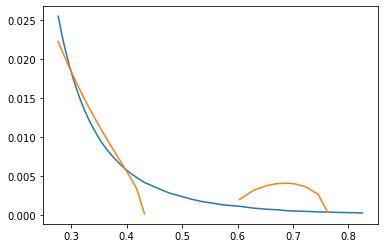

[-4.76531715e-01  4.75490976e-01  2.07298905e-04  2.36135355e+00
 -3.36694476e+00 -2.39054447e+00 -3.42579524e+00]


In [6]:
plt.plot(ww, n)
plt.plot(ww, fuc(res.x)**.5)
plt.show()
print(res.x)

In [327]:
material = pd.read_csv('index.csv', index_col=0)
print(material)

          ITO       SiN      SiO2   Acrylic
A  -35.019537  2.055931  1.199955  2.842879
B1 -48.176978  1.654266  0.657433 -1.194511
C1 -29.247261  0.025372  0.010144  2.076933
B2  29.496265 -0.000180  0.244923  1.129027
C2   0.017534  1.257386  0.009445  2.029381
B3   8.863457  0.256176  0.006110 -0.656519
C3  -0.068653  0.009454  1.405175 -0.049386


In [328]:
material['OC'] = res.x
print(material)

          ITO       SiN      SiO2   Acrylic         OC
A  -35.019537  2.055931  1.199955  2.842879   3.097209
B1 -48.176978  1.654266  0.657433 -1.194511  -0.904940
C1 -29.247261  0.025372  0.010144  2.076933  -0.083487
B2  29.496265 -0.000180  0.244923  1.129027   1.048608
C2   0.017534  1.257386  0.009445  2.029381   4.796716
B3   8.863457  0.256176  0.006110 -0.656519   4.675096
C3  -0.068653  0.009454  1.405175 -0.049386 -12.901483


In [329]:
#material.to_csv('index.csv')
print(material)

          ITO       SiN      SiO2   Acrylic         OC
A  -35.019537  2.055931  1.199955  2.842879   3.097209
B1 -48.176978  1.654266  0.657433 -1.194511  -0.904940
C1 -29.247261  0.025372  0.010144  2.076933  -0.083487
B2  29.496265 -0.000180  0.244923  1.129027   1.048608
C2   0.017534  1.257386  0.009445  2.029381   4.796716
B3   8.863457  0.256176  0.006110 -0.656519   4.675096
C3  -0.068653  0.009454  1.405175 -0.049386 -12.901483
